In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('final_spectrum_analysis_results.csv')

In [ ]:
# Basic statistics
print("Statistical Summary for Score:")
print(df['Score'].describe())
print(f"\nSkewness: {df['Score'].skew():.3f}")
print(f"Kurtosis: {df['Score'].kurtosis():.3f}")

Statistical Summary for Score:
count    27206.000000
mean         0.001724
std          0.154925
min         -0.515321
25%         -0.106610
50%         -0.011010
75%          0.098532
max          0.704745
Name: Score, dtype: float64

Skewness: 0.488
Kurtosis: 0.580


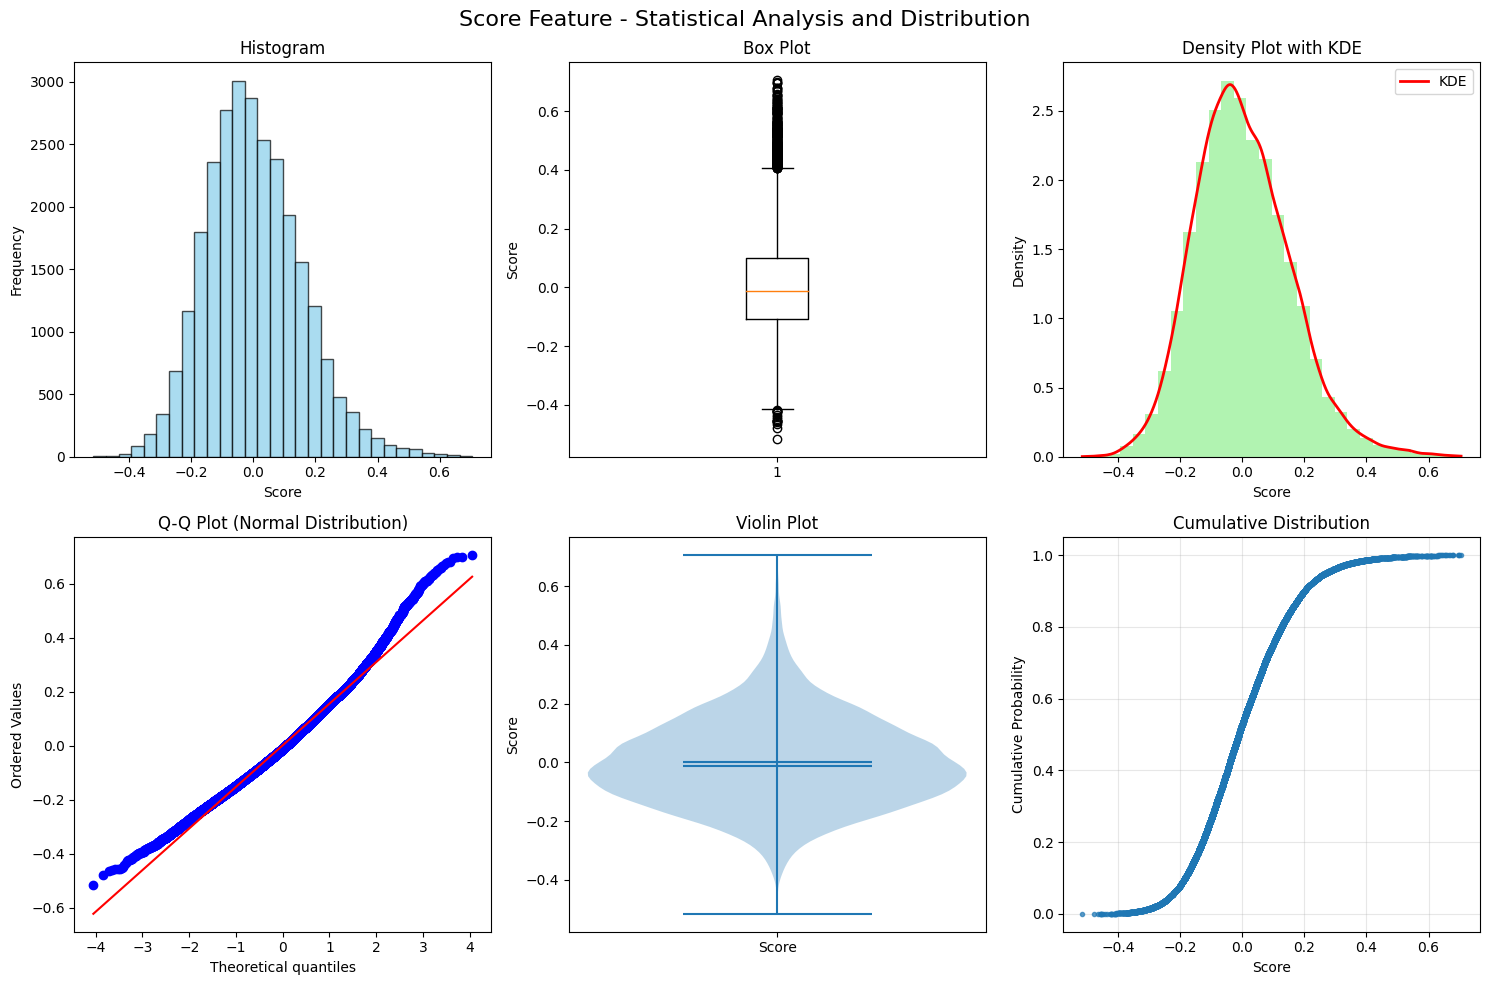

In [7]:


# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Score Feature - Statistical Analysis and Distribution', fontsize=16)

# 1. Histogram
axes[0, 0].hist(df['Score'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Histogram')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

# 2. Box plot
axes[0, 1].boxplot(df['Score'])
axes[0, 1].set_title('Box Plot')
axes[0, 1].set_ylabel('Score')

# 3. Density plot (KDE)
axes[0, 2].hist(df['Score'], bins=30, density=True, alpha=0.7, color='lightgreen')
axes[0, 2].plot(np.sort(df['Score']), 
                stats.gaussian_kde(df['Score'])(np.sort(df['Score'])), 
                'r-', linewidth=2, label='KDE')
axes[0, 2].set_title('Density Plot with KDE')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()

# 4. Q-Q plot (Normal distribution)
stats.probplot(df['Score'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')

# 5. Violin plot
parts = axes[1, 1].violinplot([df['Score']], positions=[1], showmeans=True, showmedians=True)
axes[1, 1].set_title('Violin Plot')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks([1])
axes[1, 1].set_xticklabels(['Score'])

# 6. Cumulative distribution
sorted_scores = np.sort(df['Score'])
y = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
axes[1, 2].plot(sorted_scores, y, marker='.', linestyle='none', alpha=0.7)
axes[1, 2].set_title('Cumulative Distribution')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Cumulative Probability')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

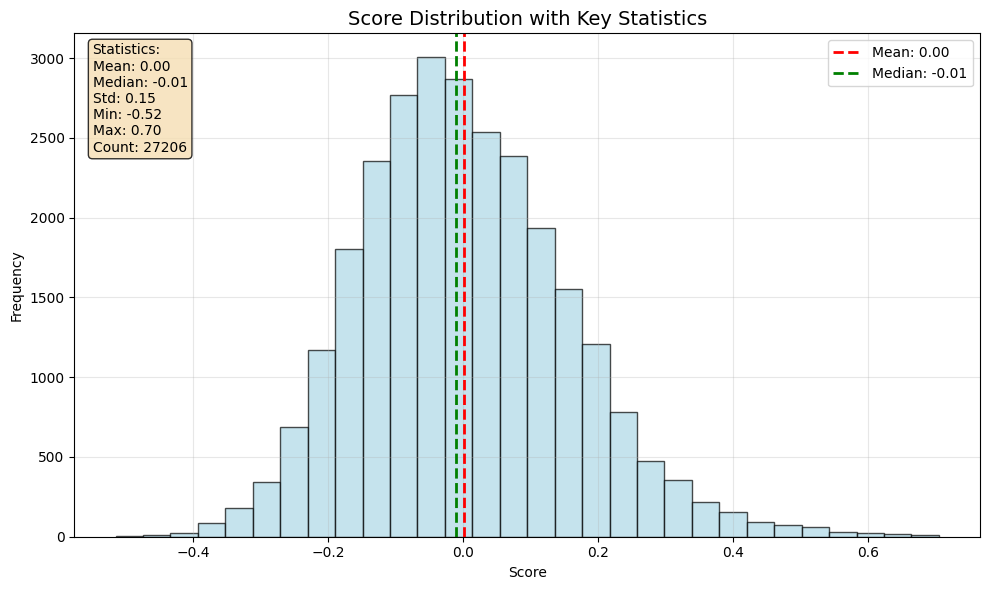

In [8]:
# Additional detailed statistics plot
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create a more detailed histogram with statistics overlay
n, bins, patches = ax.hist(df['Score'], bins=30, edgecolor='black', alpha=0.7, color='lightblue')

# Add vertical lines for mean, median, and mode
mean_score = df['Score'].mean()
median_score = df['Score'].median()

ax.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
ax.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median: {median_score:.2f}')

# Add text box with statistics
stats_text = f'''Statistics:
Mean: {mean_score:.2f}
Median: {median_score:.2f}
Std: {df['Score'].std():.2f}
Min: {df['Score'].min():.2f}
Max: {df['Score'].max():.2f}
Count: {len(df['Score'])}'''

ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_title('Score Distribution with Key Statistics', fontsize=14)
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()